In [4]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
from collections import Counter                        
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

import warnings
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1.  Data Acquisition

#### Purpose:
To identify emergency department triage accuracy using the Korean Triage and Acuity Scale (KTAS) and evaluate the causes of mistriage.
#### Variables:
- <b>Group:</b> 
- <b>Sex:</b> Sex of the patient 
- <b>Age:</b> Age of the patient 
- <b>Patients number per hour:</b>
- <b>Arrival mode:</b> Type of transportation to the hospital 
- <b>Injury:</b> Whether the patient is injured or not 
- <b>Chief_complain:</b> The patient's complaint 
- <b>Mental:</b> The mental state of the patient 
- <b>Pain:</b> Whether the patient has pain 
- <b>NRS_pain:</b> Nurse's assessment of pain for the patient 
- <b>SBP:</b> Systolic Blood Pressure.
- <b>DBP:</b> Diastolic Blood Pressure.
- <b>HR:</b> Heat Rate.
- <b>RR:</b> Respiratory rate
- <b>BT:</b> Body Temperature
- <b>Saturation:</b> 
- <b>KTAS_RN:</b>
- <b>Diagnosis in ED:</b>
- <b>Disposition:</b> Action to be taken 
- <b>KTAS_expert:</b>
- <b>Error_group:</b>
- <b>Length of stay_min:</b> 
- <b>KTAS duration_min:</b>
- <b>mistriage:</b>







The technical document in the project of the data set has been reached. It was seen in this document that some numerical data were actually categorical. These values are as follows. 

- Reason Visit : Injury [1 = No, 2= Yes]
- Gender : Sex [1 = Famale, 2 = Male]
- Pain : Pain [1 = Yes, 0 = No]
- Menatal : Mental [1 = Alert, 2 = Verbol Response, 3 = Pain Response, 4 = Unresponse]
- Type of ED : Group [1 = Local ED 3th Degree, 2 = Regional ED 4tg Degree]
- Mode of Arrival : Arrival Mode [1 = Walking, 2 = Public Ambulance, 3 = Private Vehicle, 4 = Private Ambulance, 5,6,7 = Other]
- Disposition : Disposition [1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]
- KTAS : KTAS... [1,2,3 = Emergency, 4,5 = Non-Emergency]

## 2. Exploration Data Analysis (EDA)

In [24]:
# Reading the dataset
df = pd.read_csv("../input/emergency-service-triage-application/data.csv",sep=';')

In [25]:
# The first 5 observation units of the data set were accessed.
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [26]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [27]:
# The size of the data set
df.shape

(1267, 24)

In [28]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Group,1267.000,1.457,0.498,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000
Sex,1267.000,1.522,0.500,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000
Age,1267.000,54.424,19.725,16.000,25.000,37.000,57.000,71.000,79.000,82.000,88.000,96.000
Patients number per hour,1267.000,7.519,3.161,1.000,3.000,5.000,7.000,10.000,12.000,13.000,15.000,17.000
Arrival mode,1267.000,2.821,0.808,1.000,2.000,2.000,3.000,3.000,4.000,4.000,5.000,7.000
Injury,1267.000,1.193,0.394,1.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000
Mental,1267.000,1.106,0.448,1.000,1.000,1.000,1.000,1.000,1.000,2.000,3.340,4.000
Pain,1267.000,0.564,0.496,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
KTAS_RN,1267.000,3.335,0.885,1.000,2.000,3.000,3.000,4.000,4.000,5.000,5.000,5.000
Disposition,1267.000,1.609,1.158,1.000,1.000,1.000,1.000,2.000,2.000,4.000,7.000,7.000


In [29]:
# Are there any null values?
df.isnull().values.any()

True

In [30]:
df.to_csv("triage.csv")

# 3. DATA PREPROCESSING
# 3.1. Missing Value Analysis

In [31]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BO�!",np.NaN)

missing_values_table(df)

                 n_miss  ratio
Saturation          688 54.300
NRS_pain            556 43.880
Diagnosis in ED       2  0.160


['NRS_pain', 'Saturation', 'Diagnosis in ED']

<AxesSubplot:>

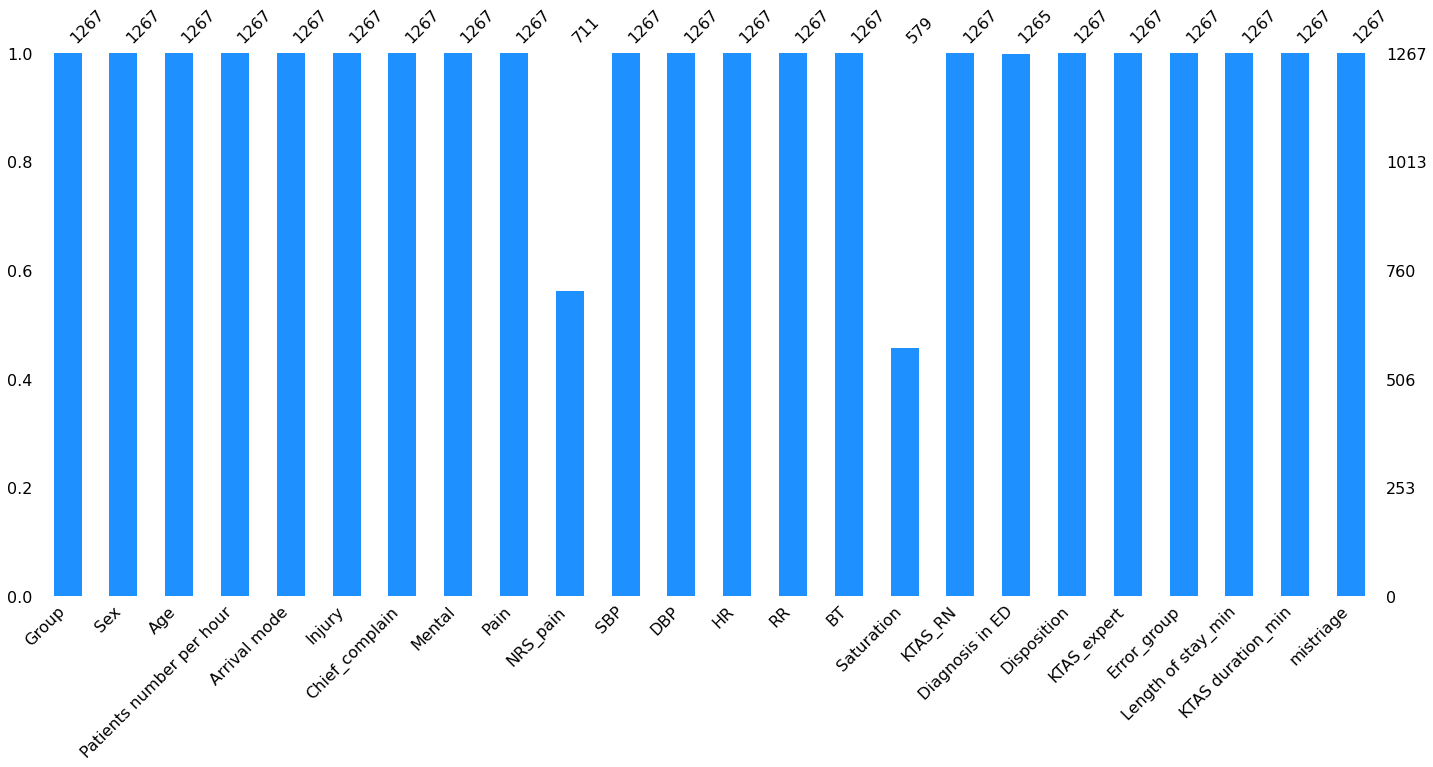

In [32]:
msno.bar(df, color="dodgerblue")

In [33]:
# Fill Missing Value

df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Diagnosis in ED"] = df.groupby(["mistriage", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))

In [34]:
df.isnull().values.any()

False

<AxesSubplot:>

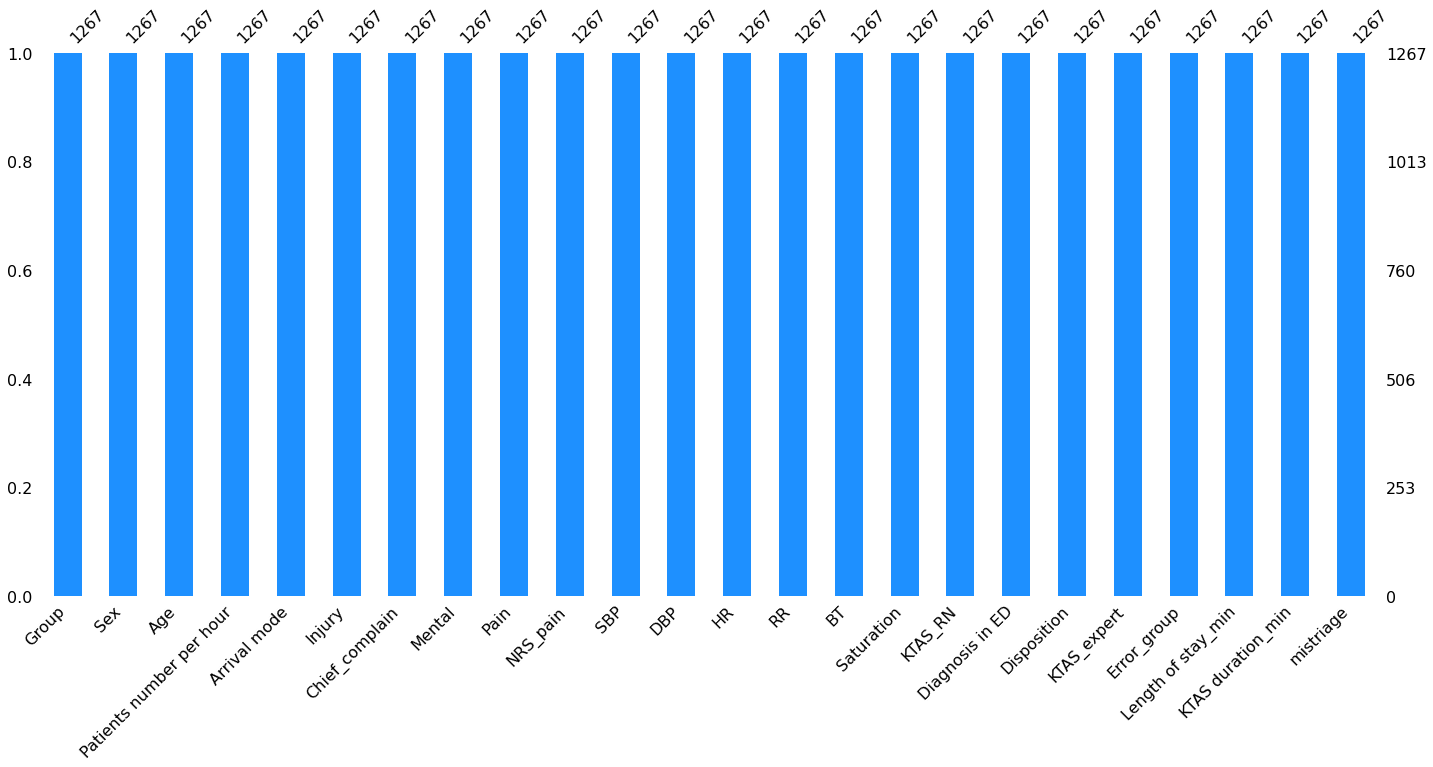

In [35]:
msno.bar(df, color="dodgerblue")

In [36]:
df.to_csv("triagena.csv")

## 3.2. Feature Engineering

In [37]:
injury_cat = ['No','Yes']
sex_cat = ['Female','Male']
pain_cat = ['No','Yes']
mental_cat = ['Alert','Verbose Response','Pain Response','Unresponsive']
group_cat = ['Local ED (3th Degree)', 'Regional ED (4th Degree)']
arrival_mode_cat = ['Walking','Public Ambulance', 'Private Vehicle','Private Ambulance', 'Other','Other','Other']
disposition_cat = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
KTAS_cat = ['Emergency','Emergency','Emergency', 'Non-Emergency', 'Non-Emergency']
mistriage_cat = ['Normal Triage','Over Triage','Under Triage']

df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(x.replace(',', '.'))))
df['NRS_pain'] = df['NRS_pain'].apply(lambda x:int(x))

###############################################################################################################################
#Categorical data were entered as numerical data. Therefore, it was categorized again categorically to make it more meaningful. 
###############################################################################################################################
df.loc[df["Sex"] == 1, "Sex"] = sex_cat[0]
df.loc[df["Sex"] == 2, "Sex"] = sex_cat[1]

df.loc[df["Injury"] == 1, "Injury"] = injury_cat[0]
df.loc[df["Injury"] == 2, "Injury"] = injury_cat[1]

df.loc[df["Pain"] == 0, "Pain"] = pain_cat[0]
df.loc[df["Pain"] == 1, "Pain"] = pain_cat[1]

df.loc[df["Mental"] == 1, "Mental"] = mental_cat[0]
df.loc[df["Mental"] == 2, "Mental"] = mental_cat[1]
df.loc[df["Mental"] == 3, "Mental"] = mental_cat[2]
df.loc[df["Mental"] == 4, "Mental"] = mental_cat[3]

df.loc[df["Group"] == 1, "Group"] = group_cat[0]
df.loc[df["Group"] == 2, "Group"] = group_cat[1]

df.loc[df["Arrival mode"] == 1, "Arrival mode"] = arrival_mode_cat[0]
df.loc[df["Arrival mode"] == 2, "Arrival mode"] = arrival_mode_cat[1]
df.loc[df["Arrival mode"] == 3, "Arrival mode"] = arrival_mode_cat[2]
df.loc[df["Arrival mode"] == 4, "Arrival mode"] = arrival_mode_cat[3]
df.loc[df["Arrival mode"] == 5, "Arrival mode"] = arrival_mode_cat[4]
df.loc[df["Arrival mode"] == 6, "Arrival mode"] = arrival_mode_cat[5]
df.loc[df["Arrival mode"] == 7, "Arrival mode"] = arrival_mode_cat[6]

df.loc[df["Disposition"] == 1, "Disposition"] = disposition_cat[0]
df.loc[df["Disposition"] == 2, "Disposition"] = disposition_cat[1]
df.loc[df["Disposition"] == 3, "Disposition"] = disposition_cat[2]
df.loc[df["Disposition"] == 4, "Disposition"] = disposition_cat[3]
df.loc[df["Disposition"] == 5, "Disposition"] = disposition_cat[4]
df.loc[df["Disposition"] == 6, "Disposition"] = disposition_cat[5]
df.loc[df["Disposition"] == 7, "Disposition"] = disposition_cat[6]

df.loc[df["KTAS_RN"] == 1, "KTAS_RN"] = KTAS_cat[0]
df.loc[df["KTAS_RN"] == 2, "KTAS_RN"] = KTAS_cat[1]
df.loc[df["KTAS_RN"] == 3, "KTAS_RN"] = KTAS_cat[2]
df.loc[df["KTAS_RN"] == 4, "KTAS_RN"] = KTAS_cat[3]
df.loc[df["KTAS_RN"] == 5, "KTAS_RN"] = KTAS_cat[4]

df.loc[df["KTAS_expert"] == 1, "KTAS_expert"] = KTAS_cat[0]
df.loc[df["KTAS_expert"] == 2, "KTAS_expert"] = KTAS_cat[1]
df.loc[df["KTAS_expert"] == 3, "KTAS_expert"] = KTAS_cat[2]
df.loc[df["KTAS_expert"] == 4, "KTAS_expert"] = KTAS_cat[3]
df.loc[df["KTAS_expert"] == 5, "KTAS_expert"] = KTAS_cat[4]

df.loc[df["mistriage"] == 0, "mistriage"] = mistriage_cat[0]
df.loc[df["mistriage"] == 1, "mistriage"] = mistriage_cat[1]
df.loc[df["mistriage"] == 2, "mistriage"] = mistriage_cat[2]
###############################################################################################################################
##############               Nonsense data was encountered in variables containing numerical data.                 ############
##############                 These values have been replaced by the mode of the variable.                        ############
###############################################################################################################################

df[["SBP","DBP","HR","RR","BT","Saturation"]] = df[["SBP","DBP","HR","RR","BT","Saturation"]].replace("??",0).astype(str).astype(float)
df['SBP'] = df['SBP'].replace(0,df['SBP'].mode()[0])
df['DBP'] = df['DBP'].replace(0,df['DBP'].mode()[0])

###############################################################################################################################
##############                                        Feature Engineering                                          ############
###############################################################################################################################
interval = (0, 25, 45, 60, 100)
cats = ['Young', 'Adult', 'Mid_Age', 'Old']
df["New_Age"] = pd.cut(df.Age, interval, labels=cats)

df.loc[df['SBP'] < 80, 'New_SBP'] = 'Low'
df.loc[(df["SBP"] >= 80) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'High'

df.loc[df['DBP'] < 60, 'New_DBP'] = 'Low'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'High'

df.loc[df['HR'] < 45, 'New_HR'] = 'Low'
df.loc[(df["HR"] >= 45) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'High'

df.loc[df['RR'] < 12, 'New_RR'] = 'Low'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 25), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 25, 'New_RR'] = 'High'

df.loc[df['BT'] < 36.4, 'New_BT'] = 'Low'
df.loc[(df["BT"] >= 36.4) & (df["BT"] <= 37.6), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.6, 'New_BT'] = 'High'

df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Low Pain'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Pain'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'High Pain'

df.loc[df['KTAS duration_min'] < 10, 'New_KTAS_duration_min'] = 'Immediate'
df.loc[(df["KTAS duration_min"] >= 10) & (df["KTAS duration_min"] <= 60), 'New_KTAS_duration_min'] = 'Very Urgent'
df.loc[(df["KTAS duration_min"] >= 61) & (df["KTAS duration_min"] <= 120), 'New_KTAS_duration_min'] = 'Urgent'
df.loc[(df["KTAS duration_min"] >= 121) & (df["KTAS duration_min"] <= 240), 'New_KTAS_duration_min'] = 'Standart'
df.loc[df['KTAS duration_min'] > 240, 'New_KTAS_duration_min'] = 'Non-Urgent'

df.loc[df['Length of stay_min'] < 10, 'New_Length_of_stay_min'] = 'Immediate'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'New_Length_of_stay_min'] = 'Very Urgent'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'New_Length_of_stay_min'] = 'Urgent'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'New_Length_of_stay_min'] = 'Standart'
df.loc[df['Length of stay_min'] > 240, 'New_Length_of_stay_min'] = 'Non-Urgent'

df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,71,3,Private Vehicle,Yes,right ocular pain,Alert,Yes,2,160.000,100.000,84.000,18.000,36.600,100.000,Emergency,Corneal abrasion,Discharge,Non-Emergency,2,86,5,Over Triage,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,56,12,Private Vehicle,Yes,right forearm burn,Alert,Yes,2,137.000,75.000,60.000,20.000,36.500,98.000,Non-Emergency,"Burn of hand, firts degree dorsum",Discharge,Non-Emergency,4,64,3,Over Triage,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,68,8,Public Ambulance,Yes,"arm pain, Lt",Alert,Yes,2,130.000,80.000,102.000,20.000,36.600,98.000,Non-Emergency,"Fracture of surgical neck of humerus, closed",Admission to Ward,Non-Emergency,4,862,1,Over Triage,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,71,8,Walking,No,ascites tapping,Alert,Yes,3,139.000,94.000,88.000,20.000,36.500,98.000,Non-Emergency,Alcoholic liver cirrhosis with ascites,Discharge,Non-Emergency,6,108,9,Over Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,58,4,Private Vehicle,No,"distension, abd",Alert,Yes,3,91.000,67.000,93.000,18.000,36.500,98.000,Non-Emergency,Ascites,Discharge,Non-Emergency,8,109,6,Over Triage,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


## 3.3. Outlier Anaysis

In [38]:
##################################################################################################################
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
##################################################################################################################
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
##################################################################################################################
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [39]:
has_outliers(df, ["Length of stay_min","Saturation","SBP","DBP","HR","RR","BT"])

Length of stay_min : 19
Saturation : 32
RR : 22
BT : 20


['Length of stay_min', 'Saturation', 'RR', 'BT']

In [40]:
outlier_column = ["Length of stay_min","Saturation","RR","BT"]
for i in outlier_column:
    replace_with_thresholds(df,i)

In [41]:
has_outliers(df, ["SBP","DBP","HR","RR","BT"])

[]

In [42]:
df.to_csv("triage_feature_preprocessed_engineered.csv")

## 4. DATA VISUALIZATION

<AxesSubplot:xlabel='KTAS duration_min', ylabel='Density'>

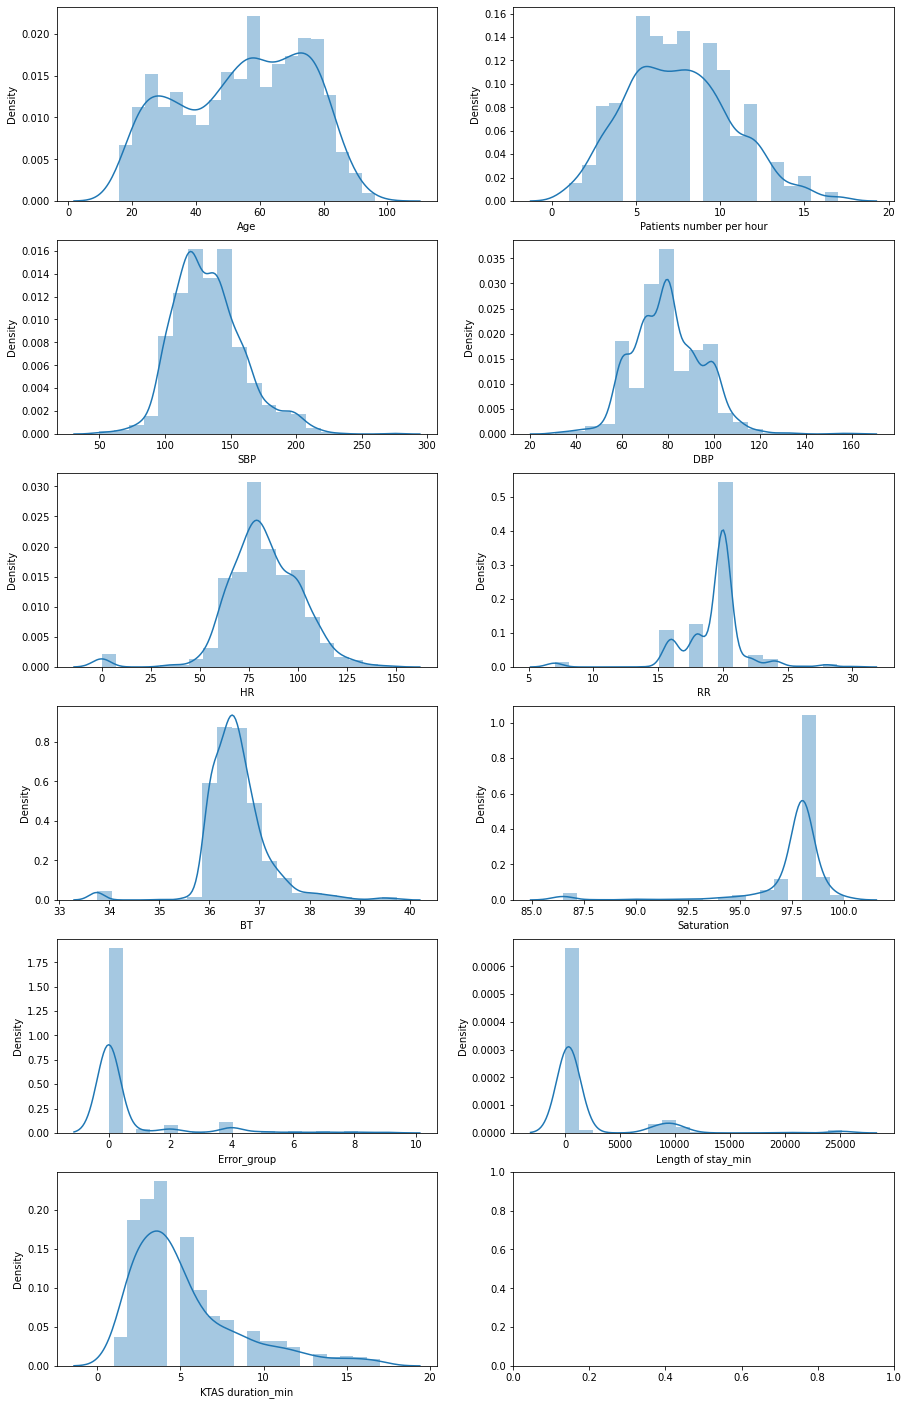

In [43]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(6,2, figsize=(15,25))
sns.distplot(df['Age'], bins = 20, ax=ax[0,0]) 
sns.distplot(df['Patients number per hour'], bins = 20, ax=ax[0,1]) 
sns.distplot(df['SBP'], bins = 20, ax=ax[1,0]) 
sns.distplot(df['DBP'], bins = 20, ax=ax[1,1]) 
sns.distplot(df['HR'], bins = 20, ax=ax[2,0])
sns.distplot(df['RR'], bins = 20, ax=ax[2,1])
sns.distplot(df['BT'], bins = 20, ax=ax[3,0]) 
sns.distplot(df['Saturation'], bins = 20, ax=ax[3,1]) 
sns.distplot(df['Error_group'], bins = 20, ax=ax[4,0])
sns.distplot(df['Length of stay_min'], bins = 20, ax=ax[4,1]) 
sns.distplot(df['KTAS duration_min'], bins = 20, ax=ax[5,0])

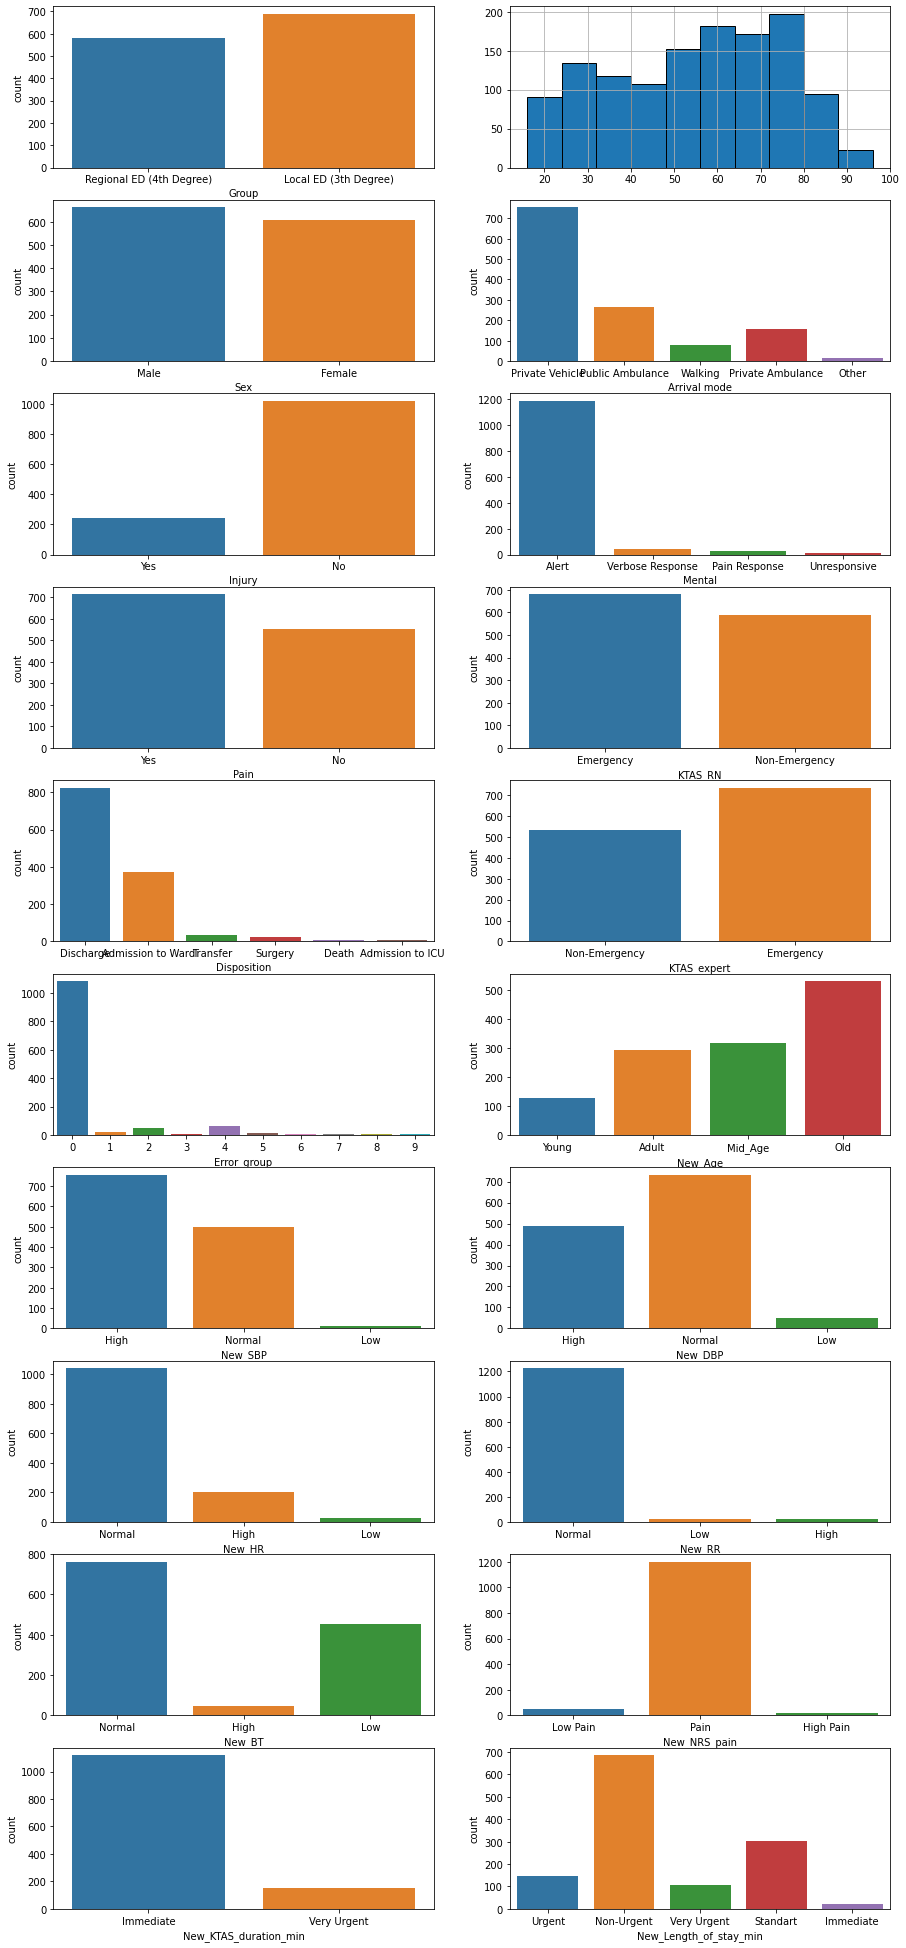

In [44]:
fig, ax = plt.subplots(10,2, figsize=(15,35))
sns.countplot('Group',data=df, ax=ax[0,0]);
df["Age"].hist(edgecolor = "black", ax=ax[0,1]);
sns.countplot('Sex',data=df, ax=ax[1,0]);
sns.countplot('Arrival mode',data=df, ax=ax[1,1]);
sns.countplot('Injury',data=df, ax=ax[2,0]);
sns.countplot('Mental',data=df, ax=ax[2,1]);
sns.countplot('Pain',data=df, ax=ax[3,0]);
sns.countplot('KTAS_RN',data=df, ax=ax[3,1]);
sns.countplot('Disposition',data=df, ax=ax[4,0]);
sns.countplot('KTAS_expert',data=df, ax=ax[4,1]);
sns.countplot('Error_group',data=df, ax=ax[5,0]);
sns.countplot('New_Age',data=df, ax=ax[5,1]);
sns.countplot('New_SBP',data=df, ax=ax[6,0]);
sns.countplot('New_DBP',data=df, ax=ax[6,1]);
sns.countplot('New_HR',data=df, ax=ax[7,0]);
sns.countplot('New_RR',data=df, ax=ax[7,1]);
sns.countplot('New_BT',data=df, ax=ax[8,0]);
sns.countplot('New_NRS_pain',data=df, ax=ax[8,1]);
sns.countplot('New_KTAS_duration_min',data=df, ax=ax[9,0]);
sns.countplot('New_Length_of_stay_min',data=df, ax=ax[9,1]);

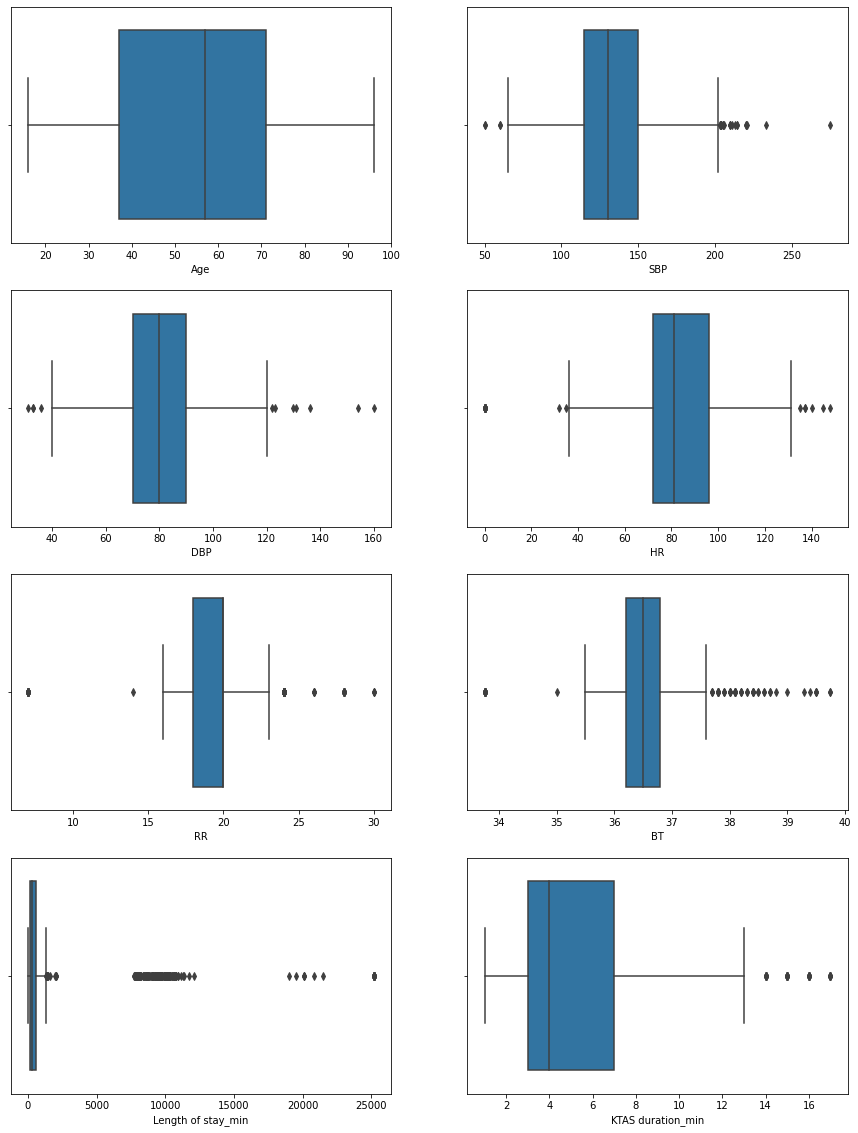

In [45]:
fig, ax = plt.subplots(4,2, figsize=(15,20))
sns.boxplot(x=df["Age"], ax=ax[0,0]);
sns.boxplot(x=df["SBP"], ax=ax[0,1]);
sns.boxplot(x=df["DBP"], ax=ax[1,0]);
sns.boxplot(x=df["HR"], ax=ax[1,1]);
sns.boxplot(x=df["RR"], ax=ax[2,0]);
sns.boxplot(x=df["BT"], ax=ax[2,1]);
sns.boxplot(x=df["Length of stay_min"], ax=ax[3,0]);
sns.boxplot(x=df["KTAS duration_min"], ax=ax[3,1]);

# 5. Data Segmentetion with Machine Learning Models
### 5.1. One Hot Encoding and Robust Scaler

In [46]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.05)
    quartile3 = variable.quantile(0.95)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [47]:
new_df = df[["Group", "Sex", "Patients number per hour", "Arrival mode", "Injury", "Mental", "Pain", "Saturation", "KTAS_RN",
"Disposition", "KTAS_expert", "Length of stay_min", "mistriage", "New_Age", "New_SBP", "New_DBP", "New_HR",
"New_RR", "New_BT", "New_NRS_pain", "New_KTAS_duration_min", "New_Length_of_stay_min"]]
new_df.head()

,Group,Sex,Patients number per hour,Arrival mode,Injury,Mental,Pain,Saturation,KTAS_RN,Disposition,KTAS_expert,Length of stay_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,3,Private Vehicle,Yes,Alert,Yes,100.000,Emergency,Discharge,Non-Emergency,86.000,Over Triage,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,12,Private Vehicle,Yes,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,64.000,Over Triage,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,8,Public Ambulance,Yes,Alert,Yes,98.000,Non-Emergency,Admission to Ward,Non-Emergency,862.000,Over Triage,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,8,Walking,No,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,108.000,Over Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,4,Private Vehicle,No,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,109.000,Over Triage,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


In [48]:
like_num = [col for col in new_df.columns if new_df[col].dtypes != 'O' and len(new_df[col].value_counts()) > 10]
cols_need_scale = [col for col in new_df.columns if col not in like_num
                   and col not in 'mistriage']

In [49]:
for col in like_num:
    new_df[col] = robust_scaler(new_df[col])

new_df, one_hot_encodeds = one_hot_encoder(new_df, cols_need_scale)

In [50]:
X = new_df.drop('mistriage', axis=1)
y = np.ravel(new_df[['mistriage']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 357)

In [51]:
X_train.head()

,Patients number per hour,Saturation,Length of stay_min,Group_Regional ED (4th Degree),Sex_Male,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Walking,Injury_Yes,Mental_Pain Response,Mental_Unresponsive,Mental_Verbose Response,Pain_Yes,KTAS_RN_Non-Emergency,Disposition_Admission to Ward,Disposition_Death,Disposition_Discharge,Disposition_Surgery,Disposition_Transfer,KTAS_expert_Non-Emergency,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal,New_NRS_pain_Low Pain,New_NRS_pain_Pain,New_KTAS_duration_min_Very Urgent,New_Length_of_stay_min_Non-Urgent,New_Length_of_stay_min_Standart,New_Length_of_stay_min_Urgent,New_Length_of_stay_min_Very Urgent
428,-0.500,-0.600,0.966,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
772,-0.200,0.000,0.006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
873,0.300,0.000,-0.020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
572,0.200,0.000,-0.013,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
385,0.200,-0.400,0.968,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


In [52]:
# Let's set the parameters to find the best parameter to use in our models. These parameters will be chosen as the best to visit with GridSearchCV.
rf_params = {"max_depth": [3, 5, 8],
             "max_features": [8, 15, 25],
             "n_estimators": [200, 500, 1000],
             "min_samples_split": [2, 5, 10]}

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [200, 500, 1000],
               "max_depth": [3, 5, 8],
               "colsample_bytree": [1, 0.8, 0.5]}

#xgb_params = {"learning_rate": [0.1, 0.01],
#              "max_depth": [3, 5, 8],
#              "n_estimators": [200, 500, 1000],
#              "colsample_bytree": [0.7, 1]}

rf = RandomForestClassifier(random_state=357)
lgbm = LGBMClassifier(random_state=357)
#xgb = XGBClassifier(random_state=357)

# Let's try the parameters one by one with the help of GridSearchCV and find the best parameter.
gs_cv_rf = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gs_cv_lgbm = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
#gs_cv_xgb = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  8.3min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.0min finished


In [53]:
#lgr_tuned = LogisticRegression(random_state=357).fit(X_train, y_train)
knn_tuned = KNeighborsClassifier().fit(X_train, y_train)
svm_tuned = SVC(random_state=357,gamma='auto').fit(X_train, y_train)
gnb_tuned = GaussianNB().fit(X_train, y_train)
dtc_tuned = DecisionTreeClassifier(random_state=357).fit(X_train, y_train)

# Let's tune the models with the best parameters found.
rf_tuned = RandomForestClassifier(**gs_cv_rf.best_params_, random_state=357).fit(X_train, y_train)
lgbm_tuned = LGBMClassifier(**gs_cv_lgbm.best_params_, random_state=357).fit(X_train, y_train)
#xgb_tuned = XGBClassifier(**gs_cv_xgb.best_params_, random_state=357).fit(X_train, y_train)

In [54]:
# Result
models = [#("LGR", lgr_tuned),
          ("KNN", knn_tuned),
          ("SVM", svm_tuned),
          ("GNB", gnb_tuned),
          ("DTC", dtc_tuned),
          ("RF", rf_tuned),
          ("LGBM", lgbm_tuned),
          #("XGB", xgb_tuned)
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

KNN: (0.893701)
SVM: (0.952756)
GNB: (0.062992)
DTC: (0.874016)
RF: (0.960630)
LGBM: (0.960630)
